# Assignment 2 Brief 

## Deadline: Tuesday, December 3, 2019 at 14:00 hrs

## Number of marks available: 20

## Scope: Sessions 6 to 9

## 1. Instructions
### How and what to submit

A. Submit a Jupyter Notebook named COM4509-6509_Assignment_2_UCard_XXXXXXXXX.ipynb where XXXXXXXXX refers to your UCard number.

B. Upload the notebook file to MOLE before the deadline above.

C. **NO DATA UPLOAD**: Please do not upload the data files used. We have a copy already. 


### Assessment Criteria 

* Being able to manipulate a dataset by generating sythetic data and extracting a particular subset. 

* Being able to build and train different machine learning models with tunable hyperparameters to optimise given evaluation metric.

* Being able to compare different machine learning models and explain interesting results observed. 

* Being able to follow examples in the lab and write code without the help of starter code.


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 5% of the mark each working day the work is late after the deadline. NO late submission will be marked one week after the deadline because we will release a solution by then. Please read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/assessment/late-submission?pli=1&authuser=1). 

### Use of unfair means 

**"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations."** (from the MSc Handbook). Please carefully read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/referencing-unfair-means?pli=1&authuser=1) on what constitutes Unfair Means if not sure.

# 2. Image classification and denoising

### The CIFAR-10 dataset
In this assignment, we will work on the [**CIFAR-10 dataset**](https://www.cs.toronto.edu/~kriz/cifar.html) collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton from the University of Toronto.  This dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. Each image is a 3-channel colour images of 32x32 pixels in size. There are 50000 training images and 10000 test images. 

			
### Question 1: Data loading and manipulation (4 marks)

1a. **Download** both the training and test data of the CIFAR-10 dataset, e.g., by following the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html). You can also download via other ways if you prefer.

1b. **Add random noise** to all training and test data to generate noisy dataset, e.g., by `torch.randn()`, with a scaling  factor `scale`, e.g., original image `+ scale * torch.randn()`, and **normalise/standardise** the pixel values to the **original range**, e.g.,  using `np.clip()`. You may choose any `scale` value between 0.2 and 0.5. 

**Note: Before generating the random noise, you MUST set the random seed to your UCard number XXXXXXXXX for reproducibility, e.g., using `torch.manual_seed()`. This seed needs to be used for all remaining code if there is randomness, for reproducibility.**

1c. **Extract a subset** with only two classes: **Cat** and **Dog** and name it starting with **CatDog**.        

1d. Show 10 pairs of original and noisy images of cats and 10 pairs of original and noisy images of dogs.

#### Question 1 Answer

In [11]:
# Write the code for your answer here. You can use multiple cells to improve readability.
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# First we can download the dataset from the pytorch dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./dataset', 
                                       train=True,
                                       download = True,
                                       transform = transform)
trainset_loader = torch.utils.data.DataLoader(trainset,
                                              batch_size=4,
                                              shuffle=True,
                                              num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./dataset',
                                      train = False,
                                      download = True,
                                      transform = transform
                                     )
testset_loader = torch.utils.data.DataLoader(testset,
                                             batch_size = 4,
                                             shuffle = False,
                                             num_workers = 2)

Files already downloaded and verified
Files already downloaded and verified


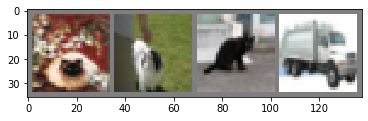

In [12]:
# Show some pictures from the train_dataset
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# get some random training images
dataiter = iter(trainset_loader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images))

In [13]:
# Now We start to generate some random noise in train dataset and test dataset
scale = 0.2
torch.manual_seed(1722400)
# Generate two new dataset using List 
list_traindata = list(trainset)
noise_train = list(trainset)
list_testdata = list(testset)

for data,label in noise_train:
    data.add_(scale * torch.randn(3,32,32))

In [14]:
# Now We should normalise/standardise the pixel values to the original range
# The Function we use is torch.clamp()
for data,label in noise_train:
    torch.clamp_(data,-1,1)

In [15]:
#Extract a subset with only two classes: Cat and Dog and name it starting with CatDog.
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')
CatDog_train = list()
CatDog_original_catdog = list()

for data,label in noise_train:
    if label == 3 or label == 5:
        CatDog_train.append((data,label))
for data,label in list_traindata:
    if label == 3 or label == 5:
        CatDog_original_catdog.append((data,label))

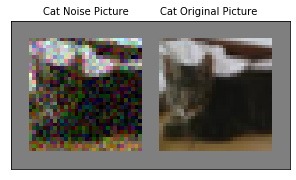

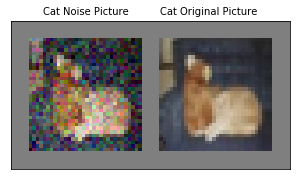

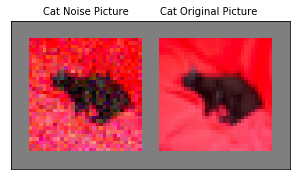

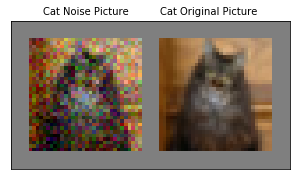

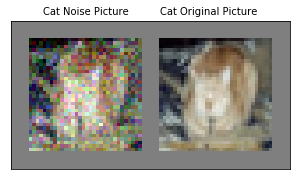

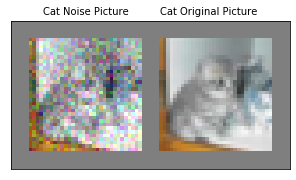

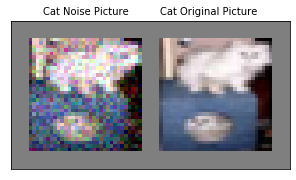

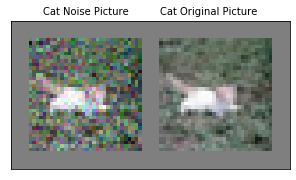

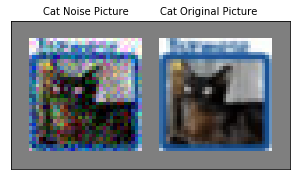

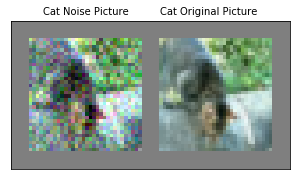

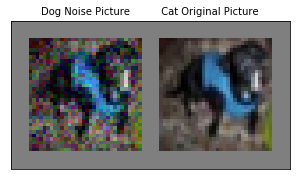

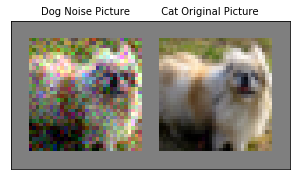

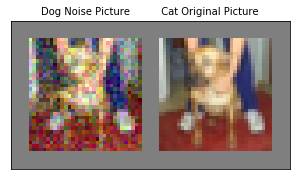

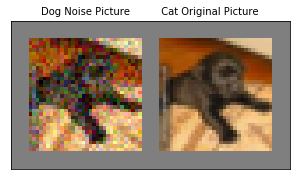

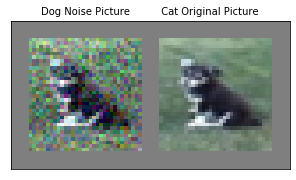

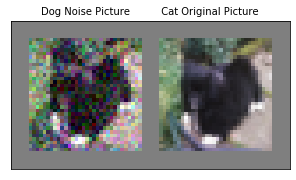

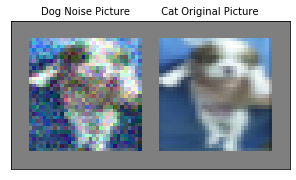

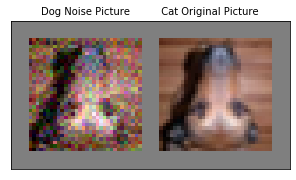

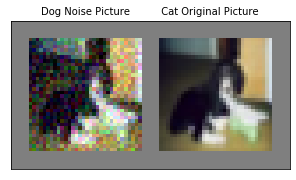

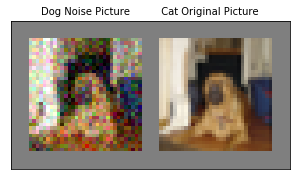

In [16]:
# Show 10 pairs of original and noisy images of cats and 10 pairs of original and noisy images of dogs.

# def cat_imshow(img,i,n_row = 1,n_col = 2):  
#     plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
#     plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
#     for j in range(n_row * n_col):
#         img = img[j]/2 + 0.5
#         npimg = img.detach().numpy()
#         ax = plt.subplot(n_row,n_col,j+1)
#         plt.sca(ax)
#         plt.axis('off') 
#         plt.imshow(np.transpose(npimg,(1,2,0)))
#         num = str(i+1)
#         plt.title('Cat Picture'+ num, size=12)
#         plt.xticks(())
#         plt.yticks(())
          
def cat_imshow(img,i,n_row = 1,n_col = 2):  
    plt.figure(figsize=(5,4.8))
    img = img/2 + 0.5
    npimg = img.detach().numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    num = str(i+1)
    plt.title('Cat Noise Picture'+'          '+'Cat Original Picture', size=10)
    plt.xticks(())
    plt.yticks(())

def dog_imshow(img,i,n_row = 1,n_col = 2):  
    plt.figure(figsize=(5,4.8))
    img = img/2 + 0.5
    npimg = img.detach().numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    num = str(i+1)
    plt.title('Dog Noise Picture'+'          '+'Cat Original Picture', size=10)
    plt.xticks(())
    plt.yticks(())

num_1 = 0
num_2 = 0
for i in range(50):
    if CatDog_train[i][1] == 3 and CatDog_original_catdog[i][1] == 3:
        cat_imshow(
            torchvision.utils.make_grid(
                [CatDog_train[i][0],CatDog_original_catdog[i][0]],
                padding = 5),
                i)
        num_1 += 1
    if num_1 == 10:
        break

for i in range(50):
    if CatDog_train[i][1] == 5 and CatDog_original_catdog[i][1] == 5:
        dog_imshow(
            torchvision.utils.make_grid(
                [CatDog_train[i][0],CatDog_original_catdog[i][0]],
                padding = 5),
                i)
        num_2 += 1
    if num_2 == 10:
        break

### Question 2: Dimensionality reduction, binary classification, and evaluation (6 marks)

This question uses the **CatDog** subset **with no noise added**.

#### Training

2a. Apply PCA on the training set to reduce the dimensionality. You need to study **at least seven** different values for the reduced dimensionality. **Explain** your choice.

2b. Train **eight** Naive Bayes classifiers: one on the original features (raw pixels), and seven on the seven different PCA features in 2a. You will need to decide on what Naive Bayes classifier (Gaussian? Multinomial? etc.) to use and **explain** your choice.

#### Testing and evaluation
2c. Evalaute the eight Naive Bayes classifiers on the test set in terms of **classification accuracy** and **visualise** their performance using a bar graph.

2d. Plot the [ROC Curves](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) in true positive rates vs false positive rates for the eight Naive Bayes classifiers in **one figure** using eight different line/marker styles clearly labelled. 

2e. Compute the [area under the ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve) values for the eight Naive Bayes classifiers and visualise using a bar graph.

2f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 


In [17]:
# Write the code for your answer here. You can use multiple cells to improve readability.
# As the hint and clue we don't need the Catdog dataset with noise

# 2a
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# Reshape the data into the correct shape which can be accepted by the PCA function
x_train = list()
y_train = list()

for each_item in CatDog_original_catdog:
    x_train.append(each_item[0].numpy())
    y_train.append(each_item[1])

x_train = np.array(x_train).reshape(len(x_train),-1)
# Employ the PCA on the x_train
# The function of PCA is to remain the maximum information from the original dataset
# 1 − (∑k1Si / ∑m1Si) ≤ 0.01
# So we need to calculate the variance(Si) to have the maximum accuracy
pca = PCA().fit(x_train)
n_component = 0 # The number of dimension to be selected
sum_si = pca.explained_variance_.sum()
current_state = 0
while(current_state / sum_si < 0.99):
    current_state += pca.explained_variance_[n_component]
    n_component += 1
print("The best dimension for PCA algorithm is:",n_component)
# Choose the seven n_component for PCA algorithm and calculate the corresponding 
pca_choose = [50,100,150,200,250,300,561]
pca_model = list()
pca_sevenvalue = list()
for i in range(len(pca_choose)):
    pcaa = PCA(n_components = pca_choose[i],whiten = True).fit(x_train)   
    x_train_intmde = pcaa.transform(x_train)
    pca_sevenvalue.append(x_train_intmde)
    pca_model.append(pcaa)
    
#     x_train_approx = pcaa.inverse_transform(x_train_intmde)
#     pca_sevenvalue.append(x_train_approx)

The best dimension for PCA algorithm is: 561


In [18]:
# 2b
# Navie Bayes classifiers for Gaussian and Multinomial
# This is the Gaussian block
# Why Choose the Gaussian Distribution:
#   Because the pixel can be treated as the random gaussian distribution value not the Binomial distribution
bayes_model = list()
for i in range(8):
    if i == 0:
        gnb = GaussianNB()
        gnb.fit(x_train,y_train)
        bayes_model.append(gnb)
    else:
        gnb = GaussianNB()
        gnb.fit(pca_sevenvalue[i-1],y_train)
        bayes_model.append(gnb)


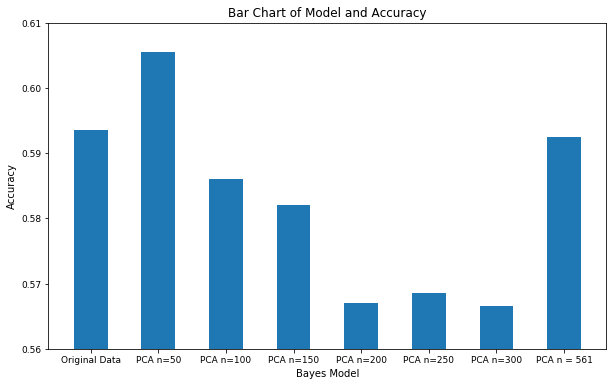

In [26]:
#2c
# Evaluate the eight different previous Bayes model 
# Get the test data from the previous data structure
CatDog_test_catdog = list()
for data,label in list_testdata:
    if label == 3 or label == 5:
        CatDog_test_catdog.append((data,label))
x_test = list()
y_test = list()
for each_item in CatDog_test_catdog:
    x_test.append(each_item[0].numpy())
    y_test.append(each_item[1])
x_test = np.array(x_test).reshape(len(x_test),-1)

# Use the Bayes model to verify the accuracy of model
accuracy_model = list()
store_predict = list()
store_proba = list()
for i in range(8):
    if i == 0:
        store_predict.append(bayes_model[i].predict(x_test))
        store_proba.append(bayes_model[i].predict_proba(x_test))
        accuracy_model.append(bayes_model[i].score(x_test,y_test))
    else:
        store_predict.append(bayes_model[i].predict(pca_model[i-1].transform(x_test)))
        store_proba.append(bayes_model[i].predict_proba(pca_model[i-1].transform(x_test)))
        accuracy_model.append(bayes_model[i].score(pca_model[i-1].transform(x_test),y_test))
        
    
# Plot the figure
x_axe = ['Original Data', 'PCA n=50', 'PCA n=100', "PCA n=150", "PCA n=200", "PCA n=250", "PCA n=300", "PCA n = 561"]
plt.figure(figsize = (10,6)) 
plt.xlabel("Bayes Model")
plt.ylabel("Accuracy")
plt.ylim(0.56,0.61)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.title("Bar Chart of Model and Accuracy")
plt.bar(x_axe,accuracy_model,width = 0.5)
plt.show()

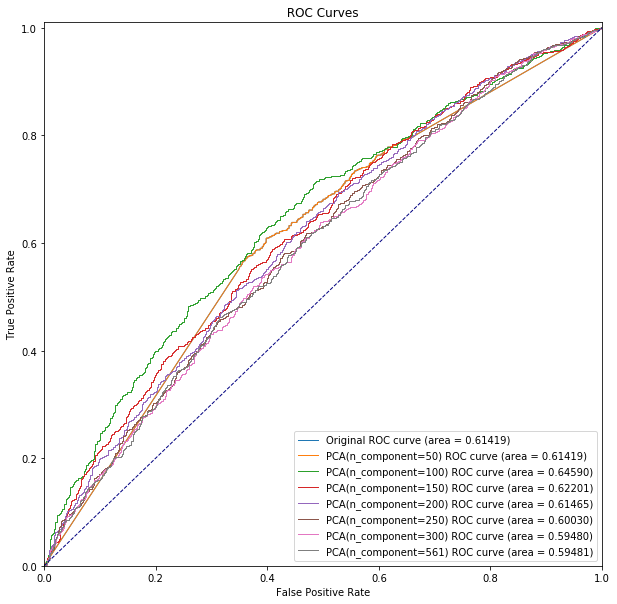

In [28]:
#2d and 2e and 2f
# Calculate the fpr,tpr using the sklearn metrics library 
from sklearn import metrics
# Get the elements for ROC image
probality_list = list()
true_list = list()
for item in store_proba:
    probality_list.append(np.around(item[:,1],decimals=30))
for i in range(len(y_test)):
    if y_test[i] == 3:
        true_list.append(0)
    else:
         true_list.append(1)
        
lines_value = list()
for i in range(8):
    fpr, tpr, _ = metrics.roc_curve(true_list, probality_list[i], pos_label=1)
    auc = metrics.auc(fpr,tpr)
    lines_value.append((fpr,tpr,auc))

# Now plot the ROC figure
plt.figure(figsize=(10,10))
plt.title(" ROC Curves ")
for i in range(8):
    if i == 0:
        plt.plot(lines_value[i][0],lines_value[i][1],lw = 1, label='Original ROC curve (area = %0.5f)' % lines_value[0][2])
    else:
        plt.plot(lines_value[i-1][0],lines_value[i-1][1],lw = 1, label='PCA(n_component=%d) ROC curve (area = %0.5f)' %(pca_choose[i-1],lines_value[i-1][2]))

plt.plot([0, 1], [0.0, 1.0], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

### Question 3: Noisy data and multiclass classification (6 marks)

#### Noisy **CatDog** subset.

3a. Repeat 2a, 2b, and 2c on the noisy version of CatDog subset. Show the bar graph and compare it with that in 2c above. 

#### Multiclass classification using the original CIFAR-10 dataset (all 10 classes)

3b. Apply PCA on the training set to reduce the dimensionality. You need to study at least **three** different values for the reduced dimensionality. Explain your choice.

3c. Train nine classifers: **four Naive Bayes** classifiers(one on the original features, and three on the three different PCA features in 3b); **four Logistic Regression** classifiers (one on the original features, and three on the three different PCA features in 3b); and one **Convoluational Neural Network** as defined in the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html).

3d. Evalaute the nine classifiers on the test set. Summarise the **classification accuracy**, **total training time**, and **total test time** using three bar graphs.

3e. Show the confusion matrix for these nine classifiers (see Lab 8 - 1.4).

3f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

In [ ]:
# Write the code for your answer here. You can use multiple cells to improve readability.
# 3a
# Now we should use the noisy dataset CatDog_train = list()
# Apply the same process on the noise dataset

noise_x = list()
noise_y = list()
for item in CatDog_train:
    noise_x.append(item[0].numpy())
    noise_y.append(item[1])

noise_x_reshape = np.array(noise_x).reshape(len(noise_x),-1)
    
pca_noise = PCA().fit(noise_x_reshape)
n_component = 0 # The number of dimension to be selected
sum_si = pca_noise.explained_variance_.sum()
current_state = 0
while(current_state / sum_si < 0.99):
    current_state += pca_noise.explained_variance_[n_component]
    n_component += 1
print("The best dimension for PCA_Noise algorithm is:",n_component)

# Now we apply the pca for different number of n_component
pca_noise_choose = [50,100,150,200,250,300,400]
pca_noise_sevenvalue = list()
pca_noise_model = list()
for i in range(len(pca_noise_choose)):
    pcaa = PCA(n_components = pca_noise_choose[i],whiten = True).fit(noise_x_reshape)
    x_noise_intmde = pcaa.transform(noise_x_reshape)
    pca_noise_sevenvalue.append(x_noise_intmde)
    pca_noise_model.append(pcaa)

# Train the Bayes model
bayes_noise_model = list()
for i in range(8):
    if i == 0:
        gnb = GaussianNB()
        gnb.fit(noise_x_reshape,noise_y)
        bayes_noise_model.append(gnb)
    else:
        gnb = GaussianNB()
        gnb.fit(pca_noise_sevenvalue[i-1],noise_y)
        bayes_noise_model.append(gnb)

# Use the Bayes model to verify the accuracy of model
accuracy_noise_model = list()
store_noise_predict = list()
store_noise_proba = list()
for i in range(8):
    if i == 0:
        store_noise_predict.append(bayes_noise_model[i].predict(x_test))
        store_noise_proba.append(bayes_noise_model[i].predict_proba(x_test))
        accuracy_noise_model.append(bayes_noise_model[i].score(x_test,y_test))
    else:
        store_noise_predict.append(bayes_noise_model[i].predict(pca_noise_model[i-1].transform(x_test)))
        store_noise_proba.append(bayes_noise_model[i].predict_proba(pca_noise_model[i-1].transform(x_test)))
        accuracy_noise_model.append(bayes_noise_model[i].score(pca_noise_model[i-1].transform(x_test),y_test))        
    
# Plot the figure
x_axe = ['Original Data', 'PCA n=50', 'PCA n=100', "PCA n=150", "PCA n=200", "PCA n=250", "PCA n=300", "PCA n = 561"]
plt.figure(figsize = (10,6)) 
plt.xlabel("Bayes Model")
plt.ylabel("Accuracy")
plt.ylim(0.11,0.121)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.title("Bar Chart of Model and Accuracy")
plt.bar(x_axe,accuracy_noise_model,width = 0.5)
plt.show()

In [ ]:
# Multiclass classification using the original CIFAR-10 dataset (all 10 classes)
# 3b
pca_all_choice = [50,100,150]
# Process the data
x_train_all = list()
y_train_all = list()
for data,label in list_traindata:
    x_train_all.append(data.numpy())
    y_train_all.append(label)

x_train_all = np.array(x_train_all).reshape(len(x_train_all),-1)
    
pca_all = PCA().fit(x_train_all)
n_component = 0 # The number of dimension to be selected
sum_si = pca_all.explained_variance_.sum()
current_state = 0
while(current_state / sum_si < 0.99):
    current_state += pca_all.explained_variance_[n_component]
    n_component += 1
print("The best dimension for PCA_All algorithm is:",n_component)

pca_all_model = list()
pca_all_sevenvalue = list()

for i in range(3):
    pca_temp = PCA(n_components = pca_all_choice[i],whiten = True).fit(x_train_all)
    x_all_intmde = pca_temp.transform(x_train_all)
    pca_all_sevenvalue.append(x_all_intmde)
    pca_all_model.append(pca_temp)

In [ ]:
# Train nine classifers: four Naive Bayes classifiers(one on the original features, and three on the three 
#different PCA features in 3b); four Logistic Regression classifiers (one on the original features, and three 
#on the three different PCA features in 3b); and one Convoluational Neural Network as defined in the pytorch 
#CIFAR10 tutorial.
# 3c
#
from sklearn.linear_model import LogisticRegression
# Train the Bayes (one original and three PCA model)
bayes_all_model = list()
for i in range(4):
    if i == 0:
        gnb = GaussianNB()
        gnb.fit(x_train_all,y_train_all)
        bayes_all_model.append(gnb)
    else:
        gnb = gaussianNB()
        gnb.fit(pca_all_sevenvalue[i-1],y_train_all)
        bayes_all_model.append(gnb)
        
# TODO: Logistic Regression classifiers 


# Convoluational Neural Network for CIFAR-10

        

### Question 4: Denoising Autoencoder (4 marks)

This question uses both the original and noisy CIFAR-10 datasets (all 10 classes).

Read about denoising autoencoder at [Wikepedia](https://en.wikipedia.org/wiki/Autoencoder#Denoising_autoencoder_(DAE)) and this [short introduction](https://towardsdatascience.com/denoising-autoencoders-explained-dbb82467fc2) or any other sources you like.

4a. Modify the autoencoder architecture in Lab 7 so that it takes colour images as input (i.e., 3 input channels). 

4b. **Training**: feed the **noisy training images** as input to the autoencoder in 4a; use a loss function that computes the reconstruction error between the **output of the autoencoder** and the respective **original images**.

4c. **Testing**: evaluate the autoencoder trained in 4b on the test datasets (feed noisy images in and compute reconstruction errors on original clean images. Find the **worstly denoised** 30 images (those with the largest reconstruction errors) in the test set and show them in pairs with the original images (60 images to show in total).

4d. Choose at least two hyperparameters to vary. Study **at least three different choices** for each hyperparameter. When varying one hyperparameter, all the other hyperparameters can be fixed. Visualise the performance sensitivity with respect to these hyperparameters.

4e. Describe **at least two** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

In [ ]:
# Write the code for your answer here. You can use multiple cells to improve readability.